In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings  
import sklearnl
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('aditya ch 69 exp apr 24.xlsx - Sheet1.csv')

In [3]:
df.head()

,INDIAN PORT,PORT_CODE,MODE,SB_DATE,RITC_2,RITC_4,RITC_8,ITEM_DESCRIPTION,QTY,UNIT,...,PIN CODE,EXPORTER_PHONE,EXPORTER_EMAIL,CONSIGNEE,CONSIGNEE_ADDRESS,FOREIGN PORT,ORIGIN_COUNTRY,INVOICE_NUMBER,MONTH,YEAR
0,AHMEDABAD ICD,INSBI6,ICD,01/04/2024,69,6911,69111011,Tableware Of Porcelain - Ar Bowl Coupe Deep 25...,240.0,PCS,...,Null,917622000807,exim1@umbertoceramics.com,FINEO GMBH.,FINEO GMBH GEWERBEPARK SUED 20 A-6068 MILS AUS...,Hamburg,Germany,1,Apr,2024
1,AHMEDABAD ICD,INSBI6,ICD,01/04/2024,69,6911,69111011,Tableware Of Porcelain - Bowl Org-12.3Cmp427Co...,240.0,PCS,...,Null,917622000807,exim1@umbertoceramics.com,FINEO GMBH.,FINEO GMBH GEWERBEPARK SUED 20 A-6068 MILS AUS...,Hamburg,Germany,1,Apr,2024
2,AHMEDABAD ICD,INSBI6,ICD,01/04/2024,69,6911,69111011,Tableware Of Porcelain - Bowl Org-16Cm-P427Co/...,600.0,PCS,...,Null,917622000807,exim1@umbertoceramics.com,FINEO GMBH.,FINEO GMBH GEWERBEPARK SUED 20 A-6068 MILS AUS...,Hamburg,Germany,1,Apr,2024
3,AHMEDABAD ICD,INSBI6,ICD,01/04/2024,69,6911,69111011,Tableware Of Porcelain - Bowl-Square-9 X9 Cm-P...,240.0,PCS,...,Null,917622000807,exim1@umbertoceramics.com,FINEO GMBH.,FINEO GMBH GEWERBEPARK SUED 20 A-6068 MILS AUS...,Hamburg,Germany,1,Apr,2024
4,AHMEDABAD ICD,INSBI6,ICD,01/04/2024,69,6911,69111011,Tableware Of Porcelain - Bowl-Vital Coupe-14Cm...,720.0,PCS,...,Null,917622000807,exim1@umbertoceramics.com,FINEO GMBH.,FINEO GMBH GEWERBEPARK SUED 20 A-6068 MILS AUS...,Hamburg,Germany,1,Apr,2024


In [4]:
print("scikit-learn version:", sklearn.__version__)
print("xgboost version:", xgboost.__version__)
print("pandas version:", pd.__version__)

NameError: name 'sklearn' is not defined

# THE CLIENT WANTS - 

#### CITY_STATE == MORBI(ships from morbi),
#### RITC_4 == 6907,
#### FOREIGN PORT == required, 
#### UNIT_VALUE_USD == predict


In [4]:
df_main = df[df['CITY_STATE']== 'MORBI']
df_main = df_main[df_main['RITC_4']==6907]

In [5]:
df_main.head()

,INDIAN PORT,PORT_CODE,MODE,SB_DATE,RITC_2,RITC_4,RITC_8,ITEM_DESCRIPTION,QTY,UNIT,...,PIN CODE,EXPORTER_PHONE,EXPORTER_EMAIL,CONSIGNEE,CONSIGNEE_ADDRESS,FOREIGN PORT,ORIGIN_COUNTRY,INVOICE_NUMBER,MONTH,YEAR
79,PANITANKI-NAXALBARI,INPNTB,Null,01/04/2024,69,6907,69072100,Polished Glazed Vitrified Tiles.,1590.0,NOS,...,Null,Null,Null,KOHINOOR MARBLE AND SUPPLIERS.,"JHAPA, ANARMANI-3",Kakarbitta (Jhapa),Nepal,1,Apr,2024
97,JOGBANI,INJBNB,Null,01/04/2024,69,6907,69072300,Ceramic Digital Wall Tiles,591.0,SQM,...,Null,Null,Null,SOHAM TRADERS,BIRATNAGAR NEPAL,Biratnagar,Nepal,1,Apr,2024
98,JOGBANI,INJBNB,Null,01/04/2024,69,6907,69072300,Ceramic Digital Wall Tiles,636.0,SQM,...,Null,Null,Null,SOHAM TRADERS,BIRATNAGAR NEPAL,Biratnagar,Nepal,1,Apr,2024
99,JOGBANI,INJBNB,Null,01/04/2024,69,6907,69072200,Ceramic Floor Tiles,918.0,SQM,...,Null,Null,Null,SOHAM TRADERS,BIRATNAGAR NEPAL,Biratnagar,Nepal,1,Apr,2024
106,SONAULI LCS,INSNLB,LCS,01/04/2024,69,6907,69072100,Ceramic Parking Tiles,700.0,NOS,...,Null,Null,Null,KATAYANI TRADING,KATHMANDU,Kathmandu,Nepal,1,Apr,2024


In [6]:
df_main.columns

Index(['INDIAN PORT', 'PORT_CODE', 'MODE', 'SB_DATE', 'RITC_2', 'RITC_4',
       'RITC_8', 'ITEM_DESCRIPTION', 'QTY', 'UNIT', 'UNIT_VALUE_FC',
       'INVOICE_CURRENCY', 'TOTAL_VALUE_FC', 'UNIT_VALUE_USD', 'EXCHANGE_USD',
       'TOTAL_VALUE_USD', 'UNIT_VALUE_INR', 'FOB', 'DRAWBACK', 'IEC',
       'EXPORTER', 'EXPORTER_ADDRESS', 'CITY_STATE', 'PIN CODE',
       'EXPORTER_PHONE', 'EXPORTER_EMAIL', 'CONSIGNEE', 'CONSIGNEE_ADDRESS',
       'FOREIGN PORT', 'ORIGIN_COUNTRY', 'INVOICE_NUMBER', 'MONTH', 'YEAR'],
      dtype='object')

In [7]:
# we don't need indian ports as we can supply from anywhere
# port_code not required
# Required are 
# 'MODE','ITEM_DESCRIPTION','QTY','UNIT_VALUE_USD','FOB', 'DRAWBACK','ORIGIN_COUNTRY'

In [8]:
df_test1 = df_main[['MODE','ITEM_DESCRIPTION','QTY','UNIT_VALUE_USD','FOB', 'DRAWBACK','ORIGIN_COUNTRY','FOREIGN PORT']]

In [9]:
df_test1.head()

,MODE,ITEM_DESCRIPTION,QTY,UNIT_VALUE_USD,FOB,DRAWBACK,ORIGIN_COUNTRY,FOREIGN PORT
79,Null,Polished Glazed Vitrified Tiles.,1590.0,4.617025,603803.00,0.0,Nepal,Kakarbitta (Jhapa)
97,Null,Ceramic Digital Wall Tiles,591.0,1.641337,79784.99,0.0,Nepal,Biratnagar
98,Null,Ceramic Digital Wall Tiles,636.0,1.969605,103032.00,0.0,Nepal,Biratnagar
99,Null,Ceramic Floor Tiles,918.0,5.434651,410346.01,0.0,Nepal,Biratnagar
106,LCS,Ceramic Parking Tiles,700.0,1.884498,108500.00,0.0,Nepal,Kathmandu


In [10]:
df_test1.shape

(13495, 8)

In [11]:
df_test1.describe()

,QTY,UNIT_VALUE_USD,FOB,DRAWBACK
count,1.349500e+04,13495.000000,1.349500e+04,13495.000000
mean,1.301846e+04,30.444093,6.561452e+05,10812.932938
std,3.266946e+04,90.083784,1.028494e+06,17346.879040
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,6.264000e+02,0.228990,1.640101e+05,2623.210000
50%,6.671840e+03,0.385710,3.292800e+05,5299.560000
75%,1.217760e+04,4.705690,7.132490e+05,11890.000000
max,2.014716e+06,2907.118644,3.485794e+07,592585.000000


In [12]:
df_test1['MODE'].value_counts()

MODE
SEA     12751
LCS       476
Null      169
AIR        68
ICD        31
Name: count, dtype: int64

In [13]:
# he use SEA as our transport

In [14]:
df_test1 = df_test1[df_test1['MODE']=='SEA']

In [15]:
df_test1.shape

(12751, 8)

# ITEM_DESCRIPTION
### 1 - Wall Tiles
### 2 - Mosaic tiles(Texture and décor)
### 3 - Ceramic Basins
### 4 - Floor Tiles
### 5 - Tablewear
### 6 - Other Comodities
### 7 - Porcelain Tiles

####  we will use the obove list to find specify thier products

In [16]:
# so we have to unify it

In [17]:
import re

def item_categorizer(txt):
    txt = str(txt).lower()
    
    if re.search(r'pgvt|polished glazed vitrified', txt):
        return 'Polished Glazed Vitrified Tiles'
    elif re.search(r'gvt|glazed vitrified', txt):
        return 'Glazed Vitrified Tiles'
    elif re.search(r'porcelain', txt):
        return 'Glazed Porcelain Tiles'
    elif re.search(r'full body', txt):
        return 'Polished Glazed Vitrified Tiles'
    elif re.search(r'double charge', txt):
        return 'Polished Glazed Vitrified Tiles'
    elif re.search(r'wall', txt) and re.search(r'ceramic', txt):
        return 'Ceramic Wall Tiles'
    elif re.search(r'floor', txt) and re.search(r'ceramic', txt):
        return 'Ceramic Floor Tiles'
    else:
        return 'Others Commodities'


In [18]:
df_test1['Categories'] = df_test1['ITEM_DESCRIPTION'].apply(item_categorizer)
df_test1['Categories'].value_counts()

Categories
Glazed Vitrified Tiles             5432
Glazed Porcelain Tiles             3277
Others Commodities                 1396
Ceramic Wall Tiles                 1131
Ceramic Floor Tiles                 792
Polished Glazed Vitrified Tiles     723
Name: count, dtype: int64

In [19]:
df_test1.head()

,MODE,ITEM_DESCRIPTION,QTY,UNIT_VALUE_USD,FOB,DRAWBACK,ORIGIN_COUNTRY,FOREIGN PORT,Categories
302,SEA,Digital Printed Glazed Porcelain Tiles Size- 2...,53.14,239.006398,1044640.80,17759.0,Qatar,Port Hamad,Glazed Porcelain Tiles
401,SEA,Digital Printed Glazed Porcelain Tiles Size- 6...,163.00,190.562075,2554818.10,43432.0,Saudi Arabia,Dammam,Glazed Porcelain Tiles
402,SEA,Digital Printed Glazed Porcelain Tiles Size- 6...,26.62,194.983163,426914.66,7258.0,Saudi Arabia,Dammam,Glazed Porcelain Tiles
438,SEA,"Glazed Vitrified Tiles(D) Size:- 600X600Mm, O/...",3974.40,8.114681,2652643.76,45095.0,Iraq,Umm Qasr,Glazed Vitrified Tiles
439,SEA,"Glazed Vitrified Tiles(L) Size:- 600X600Mm, O/...",6359.04,7.449691,3896419.51,66239.0,Iraq,Umm Qasr,Glazed Vitrified Tiles


In [20]:
# now we can map them to our desired value 

In [21]:
def item_des_num(txt): 
    if txt == 'Glazed Vitrified Tiles': 
        return 1
    elif txt == 'Glazed Porcelain Tiles':
        return 2 
    elif txt == 'Others Commodities': 
        return 3 
    elif txt == 'Ceramic Wall Tiles':
        return 4 
    elif txt == 'Ceramic Floor Tiles': 
        return 5 
    elif txt == 'Polished Glazed Vitrified Tiles': 
        return 6
    else: 
        return 7

In [22]:
df_test1['Categories']=df_test1['Categories'].apply(item_des_num)
df_test1['Categories'].value_counts()

Categories
1    5432
2    3277
3    1396
4    1131
5     792
6     723
Name: count, dtype: int64

In [23]:
df_test1.head()

,MODE,ITEM_DESCRIPTION,QTY,UNIT_VALUE_USD,FOB,DRAWBACK,ORIGIN_COUNTRY,FOREIGN PORT,Categories
302,SEA,Digital Printed Glazed Porcelain Tiles Size- 2...,53.14,239.006398,1044640.80,17759.0,Qatar,Port Hamad,2
401,SEA,Digital Printed Glazed Porcelain Tiles Size- 6...,163.00,190.562075,2554818.10,43432.0,Saudi Arabia,Dammam,2
402,SEA,Digital Printed Glazed Porcelain Tiles Size- 6...,26.62,194.983163,426914.66,7258.0,Saudi Arabia,Dammam,2
438,SEA,"Glazed Vitrified Tiles(D) Size:- 600X600Mm, O/...",3974.40,8.114681,2652643.76,45095.0,Iraq,Umm Qasr,1
439,SEA,"Glazed Vitrified Tiles(L) Size:- 600X600Mm, O/...",6359.04,7.449691,3896419.51,66239.0,Iraq,Umm Qasr,1


In [24]:
# qty can't be in float 

In [25]:
df_test1['QTY']=df_test1['QTY'].astype(int)

In [26]:
df_test1.head()

,MODE,ITEM_DESCRIPTION,QTY,UNIT_VALUE_USD,FOB,DRAWBACK,ORIGIN_COUNTRY,FOREIGN PORT,Categories
302,SEA,Digital Printed Glazed Porcelain Tiles Size- 2...,53,239.006398,1044640.80,17759.0,Qatar,Port Hamad,2
401,SEA,Digital Printed Glazed Porcelain Tiles Size- 6...,163,190.562075,2554818.10,43432.0,Saudi Arabia,Dammam,2
402,SEA,Digital Printed Glazed Porcelain Tiles Size- 6...,26,194.983163,426914.66,7258.0,Saudi Arabia,Dammam,2
438,SEA,"Glazed Vitrified Tiles(D) Size:- 600X600Mm, O/...",3974,8.114681,2652643.76,45095.0,Iraq,Umm Qasr,1
439,SEA,"Glazed Vitrified Tiles(L) Size:- 600X600Mm, O/...",6359,7.449691,3896419.51,66239.0,Iraq,Umm Qasr,1


In [27]:
# some graphs
df_test1.shape

(12751, 9)

<Axes: ylabel='QTY'>

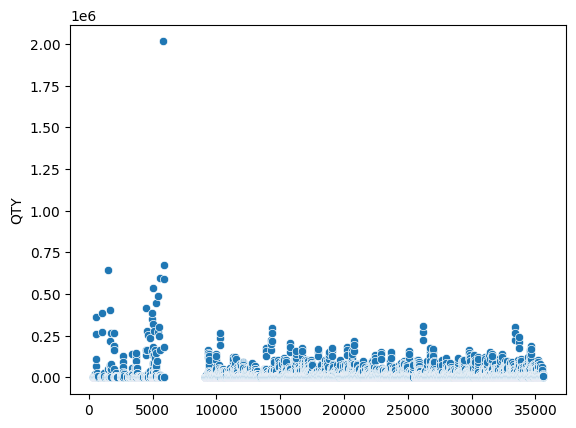

In [28]:
sns.scatterplot(df_test1['QTY'])

In [29]:
# one value too far so we have to remove it
df_test1[df_test1['QTY']>500000] # putting multiple values here we got this

,MODE,ITEM_DESCRIPTION,QTY,UNIT_VALUE_USD,FOB,DRAWBACK,ORIGIN_COUNTRY,FOREIGN PORT,Categories
1485,SEA,Glazed Vitrified Tiles (Glazed Porcelaintiles)...,641700,0.218638,11588790.31,197009.0,Romania,Constanta,1
5024,SEA,Porcelain Tiles (Water Absorption Less Than 0....,537900,0.167767,7453962.71,104355.0,Iraq,Umm Qasr,2
5566,SEA,Glazed Vitrified Tiles Size:600X1200 Mmas Per ...,595712,0.188538,9277164.43,157712.0,Libyan Arab Republic,Tripoli,1
5804,SEA,Glazed Porcelian Floor Tiles Other Details As ...,2014715,0.209463,34857936.70,592585.0,Libyan Arab Republic,Misurata,3
5909,SEA,Ceramic Glazed Vitrified Tiles (Water Absorpti...,591140,0.173009,8447721.47,143611.0,Libyan Arab Republic,Bingazi (Benghazi),1
5921,SEA,Porcelain Tiles (Water Absorption Less Than 0....,672375,0.167767,9317452.56,130444.0,Iraq,Umm Qasr,2


<Axes: ylabel='QTY'>

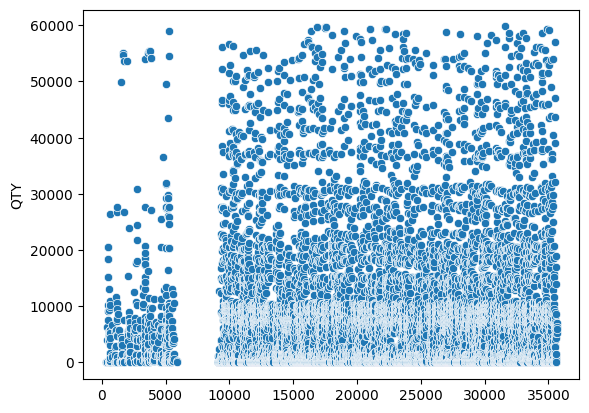

In [30]:
# 2014715 we have to remove this one also the QTY WILL be less than 60000
df_test1 = df_test1[df_test1['QTY']<60000]
sns.scatterplot(df_test1['QTY'])

In [31]:
df_test1.shape

(12213, 9)

<Axes: >

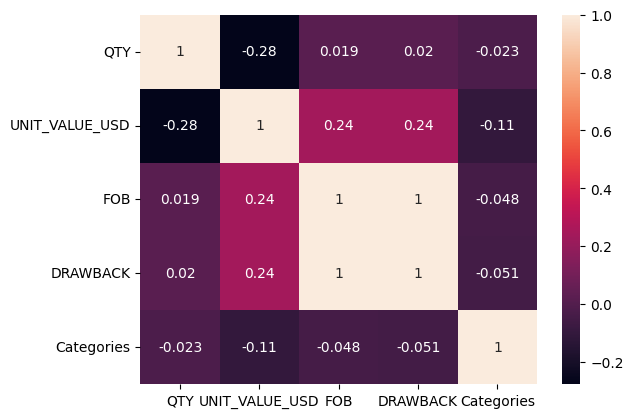

In [32]:
sns.heatmap(df_test1.corr(numeric_only=True),annot=True)

In [33]:
# we can drop item_Des cause we have categories also mode as it is sea only,FOB is just multiples on DRAWBACK

In [34]:
df_test1 = df_test1.drop(columns=['MODE','ITEM_DESCRIPTION','FOB'])

In [35]:
df_test1.head()

,QTY,UNIT_VALUE_USD,DRAWBACK,ORIGIN_COUNTRY,FOREIGN PORT,Categories
302,53,239.006398,17759.0,Qatar,Port Hamad,2
401,163,190.562075,43432.0,Saudi Arabia,Dammam,2
402,26,194.983163,7258.0,Saudi Arabia,Dammam,2
438,3974,8.114681,45095.0,Iraq,Umm Qasr,1
439,6359,7.449691,66239.0,Iraq,Umm Qasr,1


In [36]:
tier1_country = ["United States","United Kingdom","Canada","Australia","France","Germany","Italy","Spain","Netherlands","Belgium","Sweden","Japan","Singapore","Ireland","Portugal","Austria","Switzerland","New Zealand"]
tier2_country = ["Russia","Poland","United Arab Emirates","Thailand","Greece","Croatia","Romania","Oman","Albania","Kuwait","Taiwan","Qatar","Saudi Arabia","South Africa","Israel","Nepal","Colombia","Lithuania","Bulgaria","Venezuela","Morocco","Kenya","Ecuador","China","Cyprus","Kazakhstan","Jamaica","Peru","Mauritius","Maldives","Chile","Slovak Republic","Serbia","Sri Lanka","Jordan","Portugal","Angola","Trinidad & Tobago","Slovenia","Nigeria","Guyana","Honduras","Ghana","Netherlands Antilles","Iran","Brazil","Bangladesh","Costa Rica","Malta","Nicaragua","Montenegro","Bahrain","Latvia","Uzbekistan","Ukraine","Georgia","Turkey","Czech Republic","Egypt","Philippines","Bosnia & Herzegovina","Hungary","Lebanon","Korea, Republic Of","Uruguay","Algeria","Armenia","Pakistan","Cambodia","Cameroon","Vietnam, Democratic Rep. Of","Mexico","Dominican Repulic","Indonesia","Gautemala","Moldova, Republic Of","Belize","Palestine State","Fiji","Brunei"]
tier3_country = ["Somalia","Senegal","Djibouti","Madagascar","Tanzania","Azarbaijan","Reunion","Sierra Leona","Gambia","El Salvador","Ethiopia","Yemen, Democratic","Mozambique","Benin","Liberia","Macedonia,The Former Yugoslav Republic Of","Cape Verde Islands","Mauritania","Congo, The Democratic Republic Of The","Guinea","Bhutan","Cote D Ivoire","Togo","French Guyana","Tajikistan","Guinea Bissau","Surinam","Congo","Syria","Kyrghystan","Burkina Faso","Mali","French Polynesia","Martinique","Gabon","Comoros","Afghanistan","Turkmenistan","Malawi","Seychelles","Barbados"]

In [37]:
df_test1.rename(columns={'ORIGIN_COUNTRY':'FOREIGN_COUNTRY'},inplace=True)

In [38]:
Africa=["Mombasa","Port Louis","Berbera","Tema","Bingazi (Benghazi)","Misurata","Tripoli","Bata","Dar Es Salaam","Longoni","Dakar","Tamatave (Toamasina)","Nacala","Mogadishu","Monrovia","Banjul","Freetown","Toamasina","Pointe Des Galets","Praia","Nouakchott","Victoria","Douala","Matadi","Durban","Moroni","Lome","Port Sudan","Pointe Noire","Cape Town","Casablanca","Djibouti","Majunga (Mahajanga)","Port Harcourt","Onne","Luanda","Harare","Abidjan","Beira","Tincan/Lagos","Bissau","Accra","Cabinda","Cotonou","Maputo","Alger","Tangier","Apapa","Damietta","Johannesburg","Blantyre","Port Victoria","Nouadhibou","Tanga","Nossi-Be","Nairobi","Libreville","Abidos","Zanzibar","Conakry","Johannesberg","R¿Union","Sokhna"]
Asia=["Bhairawa","Kathmandu","Shanghai","Port Hamad","Jebel Ali","Nepalganj","Muara","Laem Chabang","Dubai","Dammam","Umm Qasr","Pokhara","Shuaiba","Damman",".Nepal","Bangkok","Samste Bhutan","Ho Chi Minh C","Mahendranagar Nepal","Belawan","Sohar","Haiphong","Krishnanagar Nepal","Taichung","Almaty","Janakpur","Seoul - Incheon Int'","Muscat ","Tel Aviv Yafo","Colombo","Abu Dhabi","Samdrup-Jonkhar","Mina Khalifa","Jakarta","Surabaya","Bahrain","Baghdad","Khudzhand","Bishkek (Ex Frunze)","Astana (Ex Tselinogr","Tashkent","Shuwaikh","Erbil International ","Doha","Baku","Aktau","Ashkhabad","Bandar Abbas","Dushanbe","Latakia","Osh","Koh-I-Taftan","Salalah","Ashdod","Phuntsholing","Male","Tanjung Priok","Cat Lai","Ho Chi Minh City","Chittagong","Kaohsiung","Limassol","Batumi","Taipei","Jeddah","Haifa","Naxcivan","Hodeidah","Vladivostok","Beirut","Inchon","Aden","Qingdao Pt","Tabilisi","Lat Krabang","Mersin","Da Nang","Nagoya","Incheon","Busan(Korea)","Palembang","Tan Cang - Cai Mep T","Sharjah","Nagoya ","Phnom Penh","Aqaba Free Zone","Khalifa Bin Salman P","Batam Island","Istanbul","Antalya","Izmir (Smyrna)","Diliskelesi","Semarang","Hakata/Fukuoka","Shimkent","Singapore","Cebu","Yerevan","Sulaimaniyah","Ambarli","Izmit","Iskenderun","Xiangang","Davao","Ho Chi Minh, Vict","Manila North Harbor","Poti","Aqaba (El Akaba)","Keelung (Chilung)","Vung Tau","Hithadhoo","Qingdao"]
Europe= ["Frankfurt/Main Int'L","Augusta","Gdynia","Warsaw","Moscow ","Yelgrad (Beograd)","Zagreb","Leipzig/Halle","Milan","Sheremetyevo","Constanta","London - Heathrow","Montengro","Hamburg","Malta Freeport Distr","London Gatway Port","Bucharest","Rijeka Bakar","Barcelona","Porto","Felixstowe","Thessaloniki","Novorossiysk","Varna","Helsinki ","Lisboa","Cologne ","Lisbon ","Astrakhan","St Petersburg (Ex Le","Klaipeda","Southampton","La Spezia","Sines","Valencia","Kaliningrad","Gioia Tauro","Durres","Antwerpen","San Juan Del Puerto","Leixoes","Cork","Dublin","Gdansk","Ploce","Bar","Piraeus","Burgas","Sremska Mitrovica","Koper","Palermo","Fos Sur Mer","Ravenna","Riga","Rotterdam","Naples(Italy)","Le Havre","Dunkerque","Reni","Opoczno","Marsaxlokk","Bremerhaven","Antwerp Churchill Te","Civitavecchia","Szczecin","Salerno","Napoli","Genoa","Castellon De La Plan","Liverpool","Belfast","Moskva","Stockholm","Helsingborg","Trapani","Budapest","Polace","Belgrade (Beograd)","Heraklion (Iraklion)","Lyon","Bari","Fiorano Modenese","Malta (Valetta)"]
North_America=["New York","Chicago O'Hare Int'L","Atlanta, Hartsfield ","Boston - Logan, Ma","Seattle/Tacoma , Wa","Mexico City","Houston","Pto Moin","Savannah","Vancouver","Calgary","Long Beach","Santo Domingo","Port Everglades","San Juan","Miami, Fl","Miami","Kingston","Ensenada","Caucedo Dominic Rep.","Progreso","Port Of Spain","Balboa","Puerto Cort¿S","Lazaro Cardenas","San Juan Capistrano","Halifax","Puerto Quetzal","Altamira","Seattle","Tesistan","Ecatepec","Pointe-¿-Pitre","St John","Acajutla","Everglades City","Montreal","Pointe A Pierre","Minneapolis","Puerto Caldera","Newark","Vera Cruz","Belize City","Oakland","New York Mills","Mobile","Chicago","Castries","St George","Camden Park","Guadalajara","Mazatlan","Willemstad","Bridgetown","Nashville","Boston","Caldera","Monterrey","Nassau New Providenc","Port Saint John S","Newark Apt/New York","Jacksonville","Denver International","California","Los Angeles","Fort-De-France","Norfolk","Detroit City","Moin Bay (Puerto Lim","Corinto","Toronto","Manzanillo","Veracruz"]
South_America= ["Buenaventura","Itajai","La Guaira","Guayaquil","Barranquilla","Arica","Georgetown","Puerto Cabello","Lirqu¿N","Guanta","Santos","Callao","Paramaribo","Montevideo","Cartagena","Maracaibo","Paranagua","Manaus","Navegantes","Degrad Des Cannes","San Antonio","Posorja","Itapoa","Rio De Janeiro","Valparaiso","Iquique","Marchena"]
Oceania=["Fremantle","Brisbane","Melbourne","Sydney","Adelaide","Lautoka","Papeete","Noumea","Auckland","Suva"]
def Continent_analyzer(i):
        if i in Africa:
            return 'africa'
        if i in Asia:
            return 'asia'
        if i in Europe:
            return 'europe'
        if i in North_America:
            return 'north_america'
        if i in South_America: 
            return 'south_america'
        if i in Oceania: 
            return 'oceania'

df_test1['FOREIGN PORT CONTINENT']=df_test1['FOREIGN PORT'].apply(Continent_analyzer)

In [39]:

# its where we want to send our goods too
def countries_tiers(txt):
    if txt in tier1_country:
        return '1'
    elif txt in tier2_country:
        return '2'
    else:
        return '3'

In [40]:
df_test1['FOREIGN_COUNTRY']=df_test1['FOREIGN_COUNTRY'].apply(countries_tiers)

In [41]:
df_test1.head()

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,FOREIGN PORT,Categories,FOREIGN PORT CONTINENT
302,53,239.006398,17759.0,2,Port Hamad,2,asia
401,163,190.562075,43432.0,2,Dammam,2,asia
402,26,194.983163,7258.0,2,Dammam,2,asia
438,3974,8.114681,45095.0,3,Umm Qasr,1,asia
439,6359,7.449691,66239.0,3,Umm Qasr,1,asia


<Axes: >

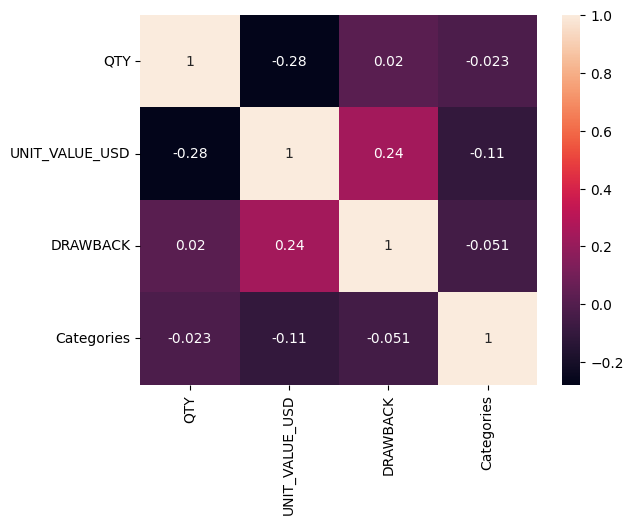

In [42]:
sns.heatmap(df_test1.corr(numeric_only=True),annot=True)

In [43]:
#they are not correlated so much , so linear regression is not the option

In [44]:
df_test1.head()

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,FOREIGN PORT,Categories,FOREIGN PORT CONTINENT
302,53,239.006398,17759.0,2,Port Hamad,2,asia
401,163,190.562075,43432.0,2,Dammam,2,asia
402,26,194.983163,7258.0,2,Dammam,2,asia
438,3974,8.114681,45095.0,3,Umm Qasr,1,asia
439,6359,7.449691,66239.0,3,Umm Qasr,1,asia


In [45]:
df_test1['DRAWBACK']=df_test1['DRAWBACK'].astype(int)

In [46]:
df_test1

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,FOREIGN PORT,Categories,FOREIGN PORT CONTINENT
302,53,239.006398,17759,2,Port Hamad,2,asia
401,163,190.562075,43432,2,Dammam,2,asia
402,26,194.983163,7258,2,Dammam,2,asia
438,3974,8.114681,45095,3,Umm Qasr,1,asia
439,6359,7.449691,66239,3,Umm Qasr,1,asia
...,...,...,...,...,...,...,...
35624,6290,0.196248,1733,1,Felixstowe,3,europe
35632,5241,3.103753,18812,2,Puerto Cort¿S,2,north_america
35633,7113,3.103753,25531,2,Puerto Cort¿S,2,north_america
35634,6364,3.103753,22844,2,Puerto Cort¿S,2,north_america


In [47]:
df_test1.isna().sum()

QTY                        0
UNIT_VALUE_USD             0
DRAWBACK                   0
FOREIGN_COUNTRY            0
FOREIGN PORT               0
Categories                 0
FOREIGN PORT CONTINENT    25
dtype: int64

In [48]:
df_test1['QTY'].max()

59789

<Axes: ylabel='QTY'>

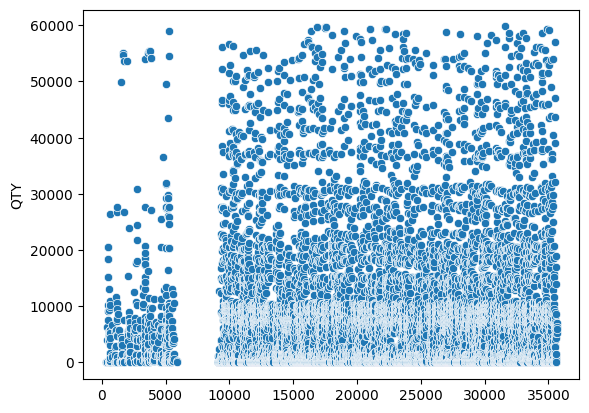

In [49]:
sns.scatterplot(df_test1['QTY'])

## Low: 0 to 1,000
### Medium: 1,000 to 8,000
#### High: 8,001 to 15,000
##### Very High: 15,001 to 60,000

In [50]:
df_test1.head()

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,FOREIGN PORT,Categories,FOREIGN PORT CONTINENT
302,53,239.006398,17759,2,Port Hamad,2,asia
401,163,190.562075,43432,2,Dammam,2,asia
402,26,194.983163,7258,2,Dammam,2,asia
438,3974,8.114681,45095,3,Umm Qasr,1,asia
439,6359,7.449691,66239,3,Umm Qasr,1,asia


In [51]:
df_test1['QTY'].value_counts()

QTY
0        129
26       125
1382     117
27       103
25        89
        ... 
560        1
14500      1
24990      1
20580      1
6027       1
Name: count, Length: 5770, dtype: int64

<Axes: ylabel='UNIT_VALUE_USD'>

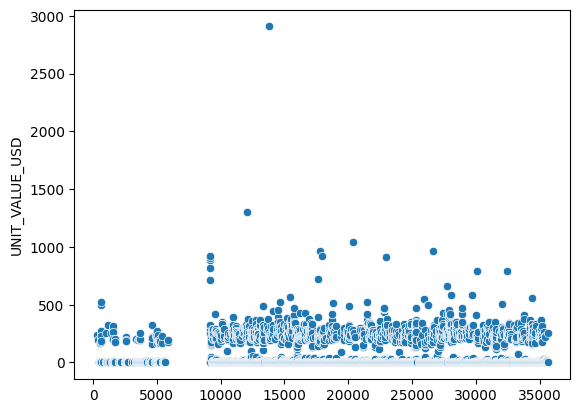

In [52]:
sns.scatterplot(df_test1['UNIT_VALUE_USD'])

In [53]:
# startup so less than 500 dollars per unit value

In [54]:
df_test1= df_test1[df_test1['UNIT_VALUE_USD']<500]

<Axes: ylabel='UNIT_VALUE_USD'>

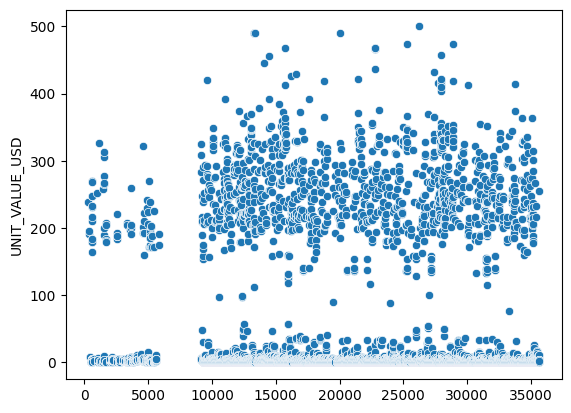

In [55]:
sns.scatterplot(df_test1['UNIT_VALUE_USD'])

In [56]:
df_test1.shape

(12180, 7)

In [57]:
df_test1['UNIT_VALUE_USD'].max()

499.744329

df_test1['UNIT_VALUE_USD']=pd.qcut(df_test1['UNIT_VALUE_USD'],q=6,labels=False,duplicates='drop')

df_test1['UNIT_VALUE_USD'].value_counts()

In [58]:
df_test1.head()

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,FOREIGN PORT,Categories,FOREIGN PORT CONTINENT
302,53,239.006398,17759,2,Port Hamad,2,asia
401,163,190.562075,43432,2,Dammam,2,asia
402,26,194.983163,7258,2,Dammam,2,asia
438,3974,8.114681,45095,3,Umm Qasr,1,asia
439,6359,7.449691,66239,3,Umm Qasr,1,asia


In [59]:
df_test1['UNIT_VALUE_USD']=pd.qcut(df_test1['UNIT_VALUE_USD'],q=4,labels=False)

In [60]:
df_test1['UNIT_VALUE_USD'].value_counts()

UNIT_VALUE_USD
3    3045
0    3045
2    3045
1    3045
Name: count, dtype: int64

-0.001, 0.23]     3045
(0.23, 0.367]      3045
(0.367, 4.76]      3045
(4.76, 499.744]    3045

In [61]:
df_test1.head(50)

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,FOREIGN PORT,Categories,FOREIGN PORT CONTINENT
302,53,3,17759,2,Port Hamad,2,asia
401,163,3,43432,2,Dammam,2,asia
402,26,3,7258,2,Dammam,2,asia
438,3974,3,45095,3,Umm Qasr,1,asia
439,6359,3,66239,3,Umm Qasr,1,asia
513,10290,0,2949,2,Jebel Ali,2,asia
514,7582,0,2173,2,Jebel Ali,2,asia
515,9207,0,2639,2,Jebel Ali,2,asia
516,18402,0,5279,2,Jebel Ali,2,asia
517,20567,0,5900,2,Jebel Ali,2,asia


In [62]:
df_test1=df_test1.drop('FOREIGN PORT',axis=1)
df_test3 = df_test1.copy()

In [63]:
df_test1.head()

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,Categories,FOREIGN PORT CONTINENT
302,53,3,17759,2,2,asia
401,163,3,43432,2,2,asia
402,26,3,7258,2,2,asia
438,3974,3,45095,3,1,asia
439,6359,3,66239,3,1,asia


In [64]:
df_test1['FOREIGN PORT CONTINENT'].value_counts()

FOREIGN PORT CONTINENT
europe           3786
asia             3435
north_america    2802
africa           1578
south_america     448
oceania           106
Name: count, dtype: int64

In [65]:
def asia_continent(txt): 
    if txt == 'asia':
        return 1 
    elif txt == 'europe': 
        return 2 
    elif txt == 'north_america': 
        return 3
    elif txt == 'africa': 
        return 4 
    elif txt == 'south_america': 
        return 5
    else: 
        return 6

In [66]:
df_test1['FOREIGN PORT CONTINENT']=df_test1['FOREIGN PORT CONTINENT'].apply(asia_continent)

In [67]:
df_test1.head()

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,Categories,FOREIGN PORT CONTINENT
302,53,3,17759,2,2,1
401,163,3,43432,2,2,1
402,26,3,7258,2,2,1
438,3974,3,45095,3,1,1
439,6359,3,66239,3,1,1


In [68]:
df_test1['DRAWBACK'] = pd.qcut(df_test1['DRAWBACK'], q=4,labels=False)

In [69]:
df_test1['DRAWBACK'].value_counts()

DRAWBACK
3    3045
2    3045
1    3045
0    3045
Name: count, dtype: int64

(-0.001, 2818.75]       3045 0
(2818.75, 5432.5]       3045 1 
(5432.5, 11099.75]      3045 2
(11099.75, 314727.0]    3045 3

In [70]:
df_test1.head()

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,Categories,FOREIGN PORT CONTINENT
302,53,3,3,2,2,1
401,163,3,3,2,2,1
402,26,3,2,2,2,1
438,3974,3,3,3,1,1
439,6359,3,3,3,1,1


In [71]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [72]:
df_test2=df_test1.copy()
df_test2.head(20)

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,Categories,FOREIGN PORT CONTINENT
302,53,3,3,2,2,1
401,163,3,3,2,2,1
402,26,3,2,2,2,1
438,3974,3,3,3,1,1
439,6359,3,3,3,1,1
513,10290,0,1,2,2,1
514,7582,0,0,2,2,1
515,9207,0,0,2,2,1
516,18402,0,1,2,2,1
517,20567,0,2,2,2,1


In [73]:
df_test2.columns

Index(['QTY', 'UNIT_VALUE_USD', 'DRAWBACK', 'FOREIGN_COUNTRY', 'Categories',
       'FOREIGN PORT CONTINENT'],
      dtype='object')

In [74]:
cols=['QTY', 'DRAWBACK', 'FOREIGN_COUNTRY', 'Categories','FOREIGN PORT CONTINENT']

In [75]:
df_test2[cols] = scalar.fit_transform(df_test2[cols])

In [76]:
df_test2.head()

,QTY,UNIT_VALUE_USD,DRAWBACK,FOREIGN_COUNTRY,Categories,FOREIGN PORT CONTINENT
302,-0.802040,3,1.341641,0.137036,-0.187192,-1.148426
401,-0.792471,3,1.341641,0.137036,-0.187192,-1.148426
402,-0.804389,3,0.447214,0.137036,-0.187192,-1.148426
438,-0.460945,3,1.341641,1.775013,-0.847298,-1.148426
439,-0.253470,3,1.341641,1.775013,-0.847298,-1.148426


In [77]:
df_test2.to_csv('Fractal_ExportData_eda.csv')

In [78]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12180 entries, 302 to 35639
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   QTY                     12180 non-null  int64 
 1   UNIT_VALUE_USD          12180 non-null  int64 
 2   DRAWBACK                12180 non-null  int64 
 3   FOREIGN_COUNTRY         12180 non-null  object
 4   Categories              12180 non-null  int64 
 5   FOREIGN PORT CONTINENT  12180 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 666.1+ KB


In [79]:
scalar = StandardScaler()
import joblib 
joblib.dump(scalar,'scaler.pkl')

['scaler.pkl']

In [80]:
df_test1['QTY'].max()

59789

In [81]:
df_test1['QTY'].min()

0

In [82]:
df_test3['DRAWBACK'].max()

314727